In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, t
import scipy
import warnings

warnings.filterwarnings('ignore')

### 과제 두가지 신약의 효과를 비교하기 위하여 t 검정을 수행하세요

- 어떤 연구자가 두가지 신약의 효과를 비교하고자 할때 두 신약을 각각 10명의 환자에게 투여하고 그 결과를 비교하였다.
- x1 = [3,4,5,6,7,8,9,10,11,12], x2 = [2,3,4,5,6,7,8,9,10,11]
- 유의수준 0.05

- 귀무가설 : 두 신약의 효과는 차이가 없다. (두집단의 평균값 차이는 0이다.)
- 대립가설 : 두 신약의 효과는 차이가 있다. (두집단의 평균값 차이는 0이 아니다.)

In [2]:
# t-test 두개의 데이터 집단간의 평균차이가 통계적으로 유의미한지 검증하는 방법 
# 두 집단의 평균, 크기, 분산 이용 -  se, t-value, p-value를 구함

x1 = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
x2 = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

x1_mean = np.mean(x1)
x1_std = np.std(x1, ddof = 1)

print(x1_mean, x1_std)

x2_mean = np.mean(x2)
x2_std = np.std(x2, ddof = 1)

print(x2_mean, x2_std)

n1 = len(x1)
n2 = len(x2)

x1_var = np.var(x1, ddof = 1)
x2_var = np.var(x2, ddof = 1)

se = np.sqrt(x1_var / n1 + x2_var / n2)

t_value = (x1_mean - x2_mean) / se # 두 집단간의 평균 차이가 표준 오차의 몇배인지를 나타냄

df = n1 + n2 - 2

p_value = 2 * (1 - t.cdf(abs(t_value), df)) # 귀무가설이 맞을 확률

print(t_value)
print(p_value)

# 유의수준 보다 크므로 귀무가설을 기각할수 없다 따라서 두집단간의 차이는 통계적으로 유의미하지 않다

7.5 3.0276503540974917
6.5 3.0276503540974917
0.7385489458759964
0.4697020728008008


In [3]:
x1 = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
x2 = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

x1_mean = np.mean(x1)
x1_std = np.std(x1, ddof =1)

x2_mean = np.mean(x2)
x2_std = np.std(x2, ddof = 1)

n1 = len(x1)
n2 = len(x2)

df = n1 + n2 - 2

se = (x1_std + x2_std) / np.sqrt(n1 + n2)

t_value = (x1_mean - x2_mean) / se

p_value = 2 * (1 - stats.t.cdf(abs(t_value), df))
p_value1 = 2 * stats.t.sf(abs(t_value),df)

print(t_value)
print(p_value)
print(p_value1)

0.7385489458759964
0.4697020728008008
0.4697020728008009


In [4]:
x1 = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
x2 = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

x1_mean = np.mean(x1)
x1_std =np.std(x1, ddof = 1)

x2_mean = np.mean(x2)
x2_std = np.std(x2, ddof = 1)

n1 = len(x1)
n2 = len(x2)

df = n1 + n2 - 2

pooled_std = np.sqrt(((n1 - 1) * x1_std ** 2 + (n2 -1) * x2_std ** 2) / df) # 등분산 가정이 어긋나기 때문 분산이 동일하지 않음 Welch's t-test
t_stats = (x1_mean - x2_mean) / (pooled_std * np.sqrt(1 / n1 + 1 / n2))

print(pooled_std)
print(t_stats)

alpha = 0.05
t_crit = stats.t.ppf(1 - alpha / 2, df)

if abs(t_stats) > t_crit :
    print('검정결과 : 두 집단의 평균값은 서로 다릅니다')

else :
    print('검정결과 : 두 집단의 평균값은 서로 같습니다')

3.0276503540974917
0.7385489458759964
검정결과 : 두 집단의 평균값은 서로 같습니다


In [5]:
x1 = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
x2 = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

x1_mean = np.mean(x1)
x1_std = np.std(x1, ddof = 1)

x2_mean = np.mean(x2)
x2_std = np.std(x2, ddof = 1)

n1 = len(x1)
n2 = len(x2)

df = n1 + n2 - 2

pooled_std = np.sqrt(((n1 - 1) * x1_std ** 2 + (n2 - 1) * x2_std ** 2) / df)
t_stats = (x1_mean - x2_mean) / (pooled_std * np.sqrt(1 / n1 + 1 / n2))

alpha = 0.05
t_crit = stats.t.ppf(1 - alpha / 2 , df)
p_value = 2 * stats.t.sf(t_stats, df)

if abs(t_stats) > t_crit :
    print('평균값 다름')

else :
    print('평균값 같음')

print(x1_std)
print(x2_std)
print(pooled_std)
print(t_stats)
print(t_crit)
print(p_value)

평균값 같음
3.0276503540974917
3.0276503540974917
3.0276503540974917
0.7385489458759964
2.10092204024096
0.4697020728008009


In [6]:
stats.ttest_ind(x1, x2, equal_var = False)

Ttest_indResult(statistic=0.7385489458759963, pvalue=0.4697020728008009)

 ### z분포와 t분포에서 신뢰구간 계산 방법의 차이

z분포와 t분포는 모집단의 평균을 추정하기 위해 사용되는 확률분포입니다. 하지만, z분포는 모집단의 표준편차를 알고 있을 때, t분포는 모집단의 표준편차를 알지 못할 때 사용됩니다. 따라서, z분포는 큰 표본(일반적으로 30개 이상)에 대해서 사용되며, t분포는 작은 표본에 대해서 사용됩니다.

z분포에서 신뢰구간을 계산하는 방법은 다음과 같습니다.

신뢰구간 = (표본평균 - (z분포의 임계값 * (표준편차/√n)), 표본평균 + (z분포의 임계값 * (표준편차/√n)))

여기서,

표본평균은 표본에서 추출된 값들의 평균입니다.
z분포는 정규분포를 따르는 모집단에서, 모집단의 분산을 알고 있을 때, 표본의 크기와 신뢰 수준에 따라 사용하는 분포입니다.
임계값은 신뢰 수준과 자유도에 따라 달라지는 값을 갖습니다.
표준편차는 표본의 분산의 제곱근입니다.
n은 표본의 크기입니다.
반면, t분포에서 신뢰구간을 계산하는 방법은 다음과 같습니다.

신뢰구간 = (표본평균 - (t분포의 임계값 * (표준오차)), 표본평균 + (t분포의 임계값 * (표준오차)))

여기서,

표본평균은 표본에서 추출된 값들의 평균입니다.
t분포는 정규분포를 따르는 모집단에서, 모집단의 분산을 모르고 표본의 크기와 신뢰 수준에 따라 사용하는 분포입니다.
임계값은 신뢰 수준과 자유도에 따라 달라지는 값을 갖습니다.
표준오차는 표본의 표준편차를 이용해 계산됩니다.
즉, t분포에서는 모집단의 분산을 알지 못하기 때문에, 표본의 분산을 이용하여 표준편차를 구합니다.

### 신뢰구간을 구할 때, 정규분포와 t분포를 적용하는 방법은 다음과 같습니다.

- 모집단의 표준편차를 알고 있는 경우
만약 모집단의 표준편차를 알고 있다면, 표본의 크기가 작을 경우에는 t분포를 사용하지만, 표본의 크기가 충분히 크다면 정규분포를 사용하여 신뢰구간을 구할 수 있습니다. 이 때, 신뢰수준(confidence level)에 따라서 z값 또는 t값을 계산하여 신뢰구간을 구합니다.

- 모집단의 표준편차를 모르는 경우
만약 모집단의 표준편차를 모르는 경우, 표본의 크기가 작은 경우에는 t분포를 사용하여 신뢰구간을 구합니다. 이 때, 신뢰수준과 자유도(degree of freedom)에 따라서 t값을 계산하여 신뢰구간을 구합니다. 자유도는 표본의 크기에서 1을 뺀 값입니다.

예를 들어, 표본의 크기가 10인 경우, t분포를 사용하여 신뢰구간을 계산하고, 표본의 크기가 30 이상인 경우에는 정규분포를 사용하여 신뢰구간을 계산하는 것이 일반적입니다.

In [7]:
# 모집단의 표준편차를 알 경우

data = np.array([49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0])

n = len(data)

mean = np.mean(data)

# 모집단의 표준 편차

pop_std = 0.5

conf_level = 0.95

# z값 계산
# 정규분포에서 어떤 확률값(누적 확률 분포)에 해당하는 z-score 표준편차 단위의 값을 계산

z_val = norm.ppf((1 + conf_level) / 2)

# 신뢰 구간

conf_int = (mean - z_val * pop_std / np.sqrt(n), mean + z_val * pop_std / np.sqrt(n))

print(f'표본 평균 {mean.round(2)}')
print(f'신뢰 구간 {conf_int[0].round(2)} ~ {conf_int[1].round(2)}')

표본 평균 50.14
신뢰 구간 49.83 ~ 50.45


In [8]:
data = np.array([49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0])

mean = np.mean(data)

n = len(data)

pop_std = 0.5

conf_level = 0.95

z_val = norm.ppf((1 + conf_level) / 2) # 신뢰 계수

conf_int = (mean - z_val * pop_std / np.sqrt(n), mean + z_val * pop_std / np.sqrt(n))

print(mean)
print(z_val)
print(np.round(conf_int, 2))

50.14
1.959963984540054
[49.83 50.45]


In [9]:
# 정규 분포에서 95% 구간을 구하기 위해 z-score을 계산

z = norm.ppf(0.975)

print(z)

1.959963984540054


In [10]:
# 모집단의 표준편차를 모르는 경우

data = np.array([49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0])

n = len(data)

mean = np.mean(data)

std = np.std(data, ddof = 1)

conf_level = 0.95

df = n - 1

# t값 계산
# 정규분포에서 어떤 확률값(누적 확률 분포)에 해당하는 t-score 표준편차 단위의 값을 계산

t_val = t.ppf((1 + conf_level) / 2, df)

# 신뢰 구간

conf_int = (mean - t_val * std / np.sqrt(n), mean + t_val * std / np.sqrt(n))

print(f'표본 평균 {mean.round(2)}')
print(f'표본 표준편차 {std.round(2)}')
print(f'신뢰 구간 {conf_int[0].round(2)} ~ {conf_int[1].round(2)}')

표본 평균 50.14
표본 표준편차 0.49
신뢰 구간 49.79 ~ 50.49


In [11]:
data = np.array([49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0])

n = len(data)

mean = np.mean(data)

std = np.std(data, ddof = 1)

conf_level = 0.95

df = n - 1

t_val = stats.t.ppf((1 + conf_level) / 2, df)

conf_int = (mean - t_val * std / np.sqrt(n), mean + t_val * std / np.sqrt(n))

print(mean)
print(t_val)
print(np.round(conf_int, 2))

50.14
2.2621571627409915
[49.79 50.49]


In [12]:
# 정규 분포에서 95% 구간을 구하기 위해 t-score을 계산

t = t.ppf(0.975, 9)

print(t)

2.2621571627409915


## 통계적 가설검정이란
모집단의 모수에 관하여 두가지 가설을 세우고 표본으로부터 계산되는 통계량을 이용하여 어느 가설이 옳은지 판단하는 통계적인 방법
- 검정통계량 vs 임곗값
- p값 vs 유의수준

통계적 가설 검정은, 모집단의 특성에 대한 가설을 세우고, 이 가설이 옳은지 여부를 검정하는 과정입니다. 이 과정에서는 표본 데이터를 이용하여 모집단의 특성을 추정하고, 추정한 결과를 바탕으로 가설을 세우고 검정합니다.

- 가설 검정에서는 대개 두 개의 가설을 세웁니다. 이 중에서 귀무가설(null hypothesis)은 일반적으로 채택되어져 있는 가설로, 이를 기각하기 위해서는 통계적으로 유의한 증거가 필요합니다. 대립가설(alternative hypothesis)은 귀무가설과 반대되는 가설로, 이 가설이 옳은지 검정하는 것이 목적입니다.

- 가설 검정에서는 먼저, 검정통계량(test statistic)을 계산합니다. 검정통계량은 표본 데이터를 이용하여 계산되는 통계량으로, 이를 통해 귀무가설이 맞는지 여부를 판단합니다. 검정통계량의 값이 특정 기준값보다 작으면, 귀무가설을 기각할 수 있습니다. 이 기준값은 보통 유의수준(significance level)이라고 불리며, 보통 0.05나 0.01로 설정됩니다. 이러한 유의수준은 귀무가설을 잘못 기각할 확률을 의미합니다.

- 가설 검정에서는 또한, 검정통계량의 분포를 이용하여 p값(p-value)을 계산합니다. p값은 귀무가설이 옳은데도 불구하고, 검정통계량이 현재 값 이상이 나올 확률을 의미합니다. 만약 p값이 유의수준보다 작으면, 귀무가설을 기각할 수 있습니다. 반대로, p값이 유의수준보다 크다면, 귀무가설을 기각할 수 없습니다.

- 가설 검정은 통계학에서 매우 중요한 개념 중 하나로, 데이터 분석의 근간을 이루는 기술 중 하나입니다. 특히, 가설 검정은 과학적인 사실을 검증하고, 의사결정을 하기 위해 필요한 중요한 도구입니다.

#### z-검정 vs t-검정
- z-검정은 모집단의 분산이 알려져 있을 때 사용할 수 있는 검정 방법입니다. 예를 들어, 어떤 특성에 대한 모집단 분포가 정규분포를 따른다는 가정하에, 표본의 평균을 이용하여 모집단 평균을 추론하는 경우에 사용됩니다. 이때 표본 크기가 충분히 크다면, 중심극한정리에 따라 표본평균이 정규분포를 따르기 때문에 z-검정을 사용할 수 있습니다. z-검정은 검정통계량으로 z-score(표준정규분포 상에서의 위치)를 사용하며, z-score가 임계치보다 큰지 여부로 가설검정을 수행합니다.

- t-검정은 모집단의 분산이 알려져 있지 않을 때 사용할 수 있는 검정 방법입니다. 예를 들어, 표본의 크기가 작거나 모집단이 정규분포를 따르지 않는 경우 t-검정을 사용할 수 있습니다. t-검정은 검정통계량으로 t-score(표준정규분포 대신 t-분포 상에서의 위치)를 사용하며, t-score가 임계치보다 큰지 여부로 가설검정을 수행합니다. t-검정에서 사용되는 임계치는 자유도(degree of freedom)와 유의수준에 따라 달라집니다.

- 따라서, z-검정은 모집단 분산이 알려져 있을 때, t-검정은 모집단 분산이 알려져 있지 않을 때 사용됩니다. 또한, t-검정은 표본 크기가 크면 z-검정과 유사한 결과를 보여줄 수 있습니다.
    - z_score = (sample_mean - mu) / (sigma / np.sqrt(sample_size))
    - t_score = (sample_mean - mu) / (sample_std / np.sqrt(sample_size))

In [13]:
# sf 함수는 "Survival Function"의 약어로, 확률 분포 함수 중 하나입니다. 
# 이 함수는 특정 값보다 큰 값을 가지는 확률

x = -1.6448536269514722

p = stats.norm.sf(x)

print(p)

0.95


In [14]:
# 양측 검정 : 상한값
stats.norm.isf(0.975)

-1.959963984540054

In [15]:
# 하한값
stats.norm.isf(1 - 0.975)

1.959963984540054

In [16]:
# isf : sf 의 역함수

th1 = stats.norm.isf(1 - 0.05 / 2)
print(th1)

th2 = stats.norm.isf(0.05 / 2)
print(th2)

-1.959963984540054
1.9599639845400545


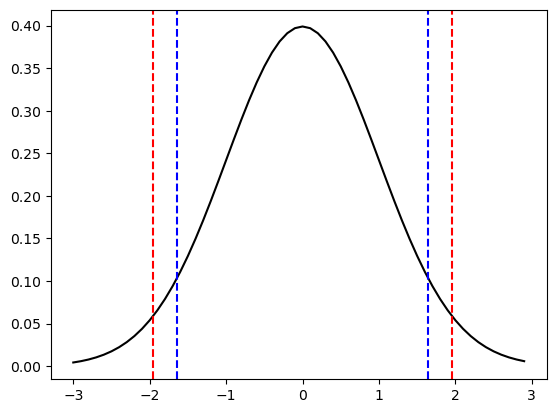

-1.959963984540054
1.9599639845400545
-1.6448536269514722
1.6448536269514729


In [17]:
# 양측 검정
t1 = stats.norm.isf(1 - 0.05 / 2)
t2 = stats.norm.isf(0.05 / 2)

# 단측 검정
t3 = stats.norm.isf(1 - 0.05)
t4 = stats.norm.isf(0.05)


x_plot = np.arange(-3, 3, 0.1)

plt.plot(x_plot, stats.norm.pdf(x = x_plot, loc = 0, scale = 1), color = 'black')

plt.axvline(t1, color = 'red', linestyle = '--', label = '임계값')
plt.axvline(t2, color = 'red', linestyle = '--', label = '임계값')

plt.axvline(t3, color = 'blue', linestyle = '--', label = '단일 임계값')
plt.axvline(t4, color = 'blue', linestyle = '--', label = '단일 임계값')


plt.show()

print(t1)
print(t2)
print(t3)
print(t4)

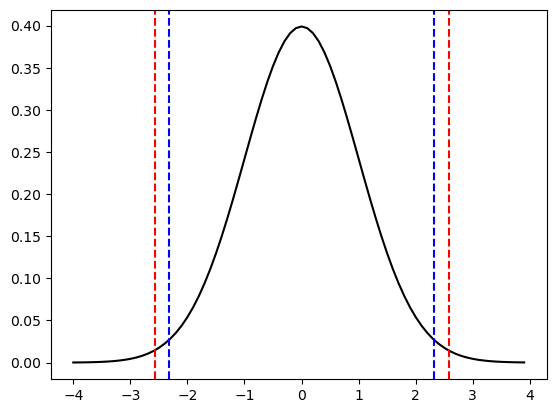

-2.5758293035489004
2.575829303548901
-2.3263478740408408
2.3263478740408408


In [18]:
t1 = stats.norm.isf(1 - 0.01 / 2)
t2 = stats.norm.isf(0.01 / 2)

t3 = stats.norm.isf(1 - 0.01)
t4 = stats.norm.isf(0.01)


x_plot = np.arange(-4, 4, 0.1)

plt.plot(x_plot, stats.norm.pdf(x = x_plot, loc = 0, scale = 1), color = 'black')

plt.axvline(t1, color = 'red', linestyle = '--', label = '임계값')
plt.axvline(t2, color = 'red', linestyle = '--', label = '임계값')

plt.axvline(t3, color = 'blue', linestyle = '--', label = '단일 임계값')
plt.axvline(t4, color = 'blue', linestyle = '--', label = '단일 임계값')

plt.show()

print(t1)
print(t2)
print(t3)
print(t4)

### t 검정 임계값

t 검정에서는 검정 통계량(t_score)을 사용하여 가설 검정을 수행합니다 이때 검정 통계량은 t- 분포를 따르므로 유의 수준(alpha)과 검정방향(양측검정 또는 단측검정)에 따라 t-분포의 분위수를 사용하여 임계값을 결정

- z-score는 정규 분포에서 특정 값이 평균으로부터 몇 개의 표준편차만큼 떨어져 있는지를 나타내는 표준화된 지표입니다
- 유의 확률(significance level)은 통계적 가설 검정에서 귀무 가설(null hypothesis)을 기각하는 기준이 되는 임계값을 의미합니다. 일반적으로 알파(alpha)라고도 하며, 주로 0.05 또는 0.01로 설정됩니다.

In [19]:
# z_score , z 유의확률
np.random.seed(0)

mu = 100
sigma = 10

sample_size = 100
sample = np.random.normal(mu, sigma, sample_size)

sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof = 1)

z = (sample_mean - mu) / (sigma / np.sqrt(sample_size)) 
p_value = 1 - norm.cdf(z)
p_value1 = norm.sf(z)

print('검정 통계량 : ', z)
print('유의확률 : ', p_value)
print('유의확률 : ', p_value1)

검정 통계량 :  0.5980801553448742
유의확률 :  0.2748932254312002
유의확률 :  0.27489322543120026


In [20]:
np.random.seed(0)


mu = 100
sigma = 10

sample_size = 100
sample = np.random.normal(mu, sigma, sample_size)

sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)

z = (sample_mean - mu) / (sigma / np.sqrt(sample_size))
p_value = stats.norm.sf(z)

print(z)
print(p_value)

0.5980801553448742
0.27489322543120026


In [21]:
# t_score , t 유의확률

np.random.seed(0)

mu = 100

sample_size = 20
sample = np.random.normal(mu, 10, sample_size)

sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof = 1)

t_score = (sample_mean - mu) / (sample_std / np.sqrt(sample_size))
p_value = 2 * (1 - stats.t.cdf(abs(t_score), df = sample_size - 1))

print('검정 통계량 : ', t_score)
print('유의확률 : ', p_value)

검정 통계량 :  2.9189863104097795
유의확률 :  0.00880335945985311


In [22]:
np.random.seed(0)

mu = 100

sample_size = 20
sample = np.random.normal(mu, 10, sample_size)

sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)

t_score = (sample_mean - mu) / (sample_std / np.sqrt(sample_size))
p_value = 2 * (stats.t.sf(abs(t_score), df = sample_size - 1))

print(t_score)
print(p_value)

2.9189863104097795
0.008803359459853088


In [23]:
# 양측 검정

alpha = 0.05 # 유의 수준
df = 19 # 자유도
t_crit = stats.t.ppf(alpha / 2, df)
t_crit2 = stats.t.ppf(1 - alpha / 2, df)

print('임계값 : ', t_crit, t_crit2)

임계값 :  -2.0930240544082634 2.093024054408263


In [24]:
# 우측 단측 검정

alpha = 0.05 # 유의 수준
df = 19 # 자유도
t_crit = stats.t.ppf(1 - alpha, df)

print('임계값 : ', t_crit)

임계값 :  1.729132811521367


In [25]:
# 좌측 단측 검정

alpha = 0.05 # 유의 수준
df = 19 # 자유도
t_crit = stats.t.ppf(alpha, df)

print('임계값 : ', t_crit)

임계값 :  -1.7291328115213678


In [26]:
# 모집단의 평균과 표준편차를 지정합니다.

np.random.seed(0)

mu = 100
sigma = 10

# 표본 데이터를 생성합니다.
sample_size = 100
sample = np.random.normal(mu, sigma, sample_size)

# 표본 평균과 표준편차를 계산합니다.
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)

# 검정통계량과 유의확률을 계산합니다.
z = (sample_mean - mu) / (sigma / np.sqrt(sample_size))
p_value = 1 - norm.cdf(z)
p_value = norm.sf(z)# 단측 검정 계산

print('검정통계량:', z)
print('유의확률:', p_value)

alpha = 0.05
critical_value = norm.ppf(1 - alpha / 2)
critical_value = norm.ppf(alpha / 2)
lower_bound = -critical_value
upper_bound = critical_value

print(f"임계값: ({lower_bound}, {upper_bound})")
# 임계값: (-1.959963984540054, 1.959963984540054) 범위내 z score가 있으므로 귀무가설을 기각할 수 없음
# p값이 0.05 보다 크므로 귀무가설을 기각할 수 없음

검정통계량: 0.5980801553448742
유의확률: 0.27489322543120026
임계값: (1.9599639845400545, -1.9599639845400545)


- 검정통계량 z 값과 유의수준(α)에 따라서 임계값을 계산할 수 있습니다. 보통 α=0.05로 설정하여 유의수준이 5%일 때, 양측검정을 할 경우 임계값은 ±1.96이 됩니다.

- 만약 단측검정을 수행한다면, 유의수준(α)과 검정 방향에 따라서 임계값이 달라집니다. 예를 들어, 유의수준이 5%이고, 검정 방향이 오른쪽(대립가설: 평균 > 기준값)인 경우에는 임계값이 1.645가 됩니다.

- 따라서, 해당 코드에서는 양측검정을 수행하므로, 임계값은 ±1.96이 됩니다. 이를 코드로 나타내면 다음과 같습니다.

In [27]:
np.random.seed(0)

mu = 100
sigma = 10

sample_size = 100
sample = np.random.normal(mu, sigma, sample_size)

sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)

z = (sample_mean - mu) / (sigma / np.sqrt(sample_size))

p_value = 1 - stats.norm.cdf(z)
p_value = stats.norm.sf(z)

print(z)
print(p_value)

alpha = 0.05

critical_value = stats.norm.ppf(1 - alpha / 2)
lower_bound = - critical_value
upper_bound =  critical_value

print(lower_bound, upper_bound)

0.5980801553448742
0.27489322543120026
-1.959963984540054 1.959963984540054


0.009024007157468749
0.5980801553448742
2.3646315924978363


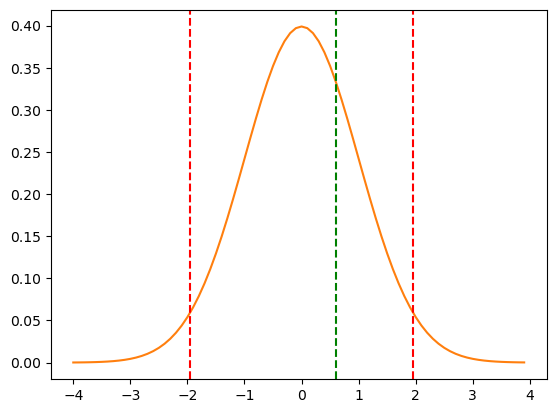

In [36]:
x_plot = np.arange(-4, 4, 0.1)

plt.plot(x_plot, stats.norm.pdf(x = x_plot, loc = 0, scale = 1), color = 'C1')

plt.axvline(critical_value, color = 'red', linestyle = '--')
plt.axvline(- critical_value, color = 'red', linestyle = '--')
plt.axvline(z, color = 'green', linestyle = '--')

print(p_value)
print(z)
print(stats.norm.isf(p_value))

plt.show()

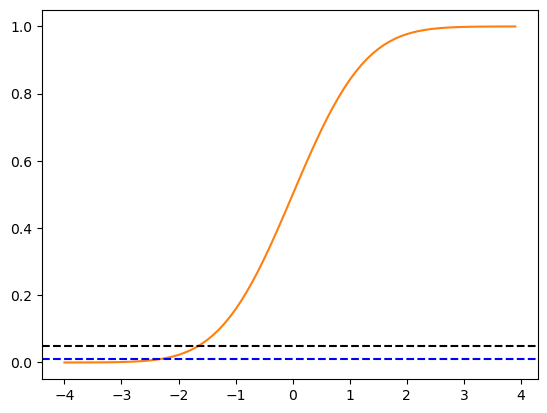

In [37]:
plt.plot(x_plot, stats.norm.cdf(x = x_plot, loc = 0, scale = 1), color = 'C1')

plt.axhline(p_value, color = 'blue', linestyle = '--')
plt.axhline(alpha, color = 'black', linestyle = '--')


### p_value를 계산하고 검정을 수행하는 방법

stats.stats.t.cdf() 함수를 이용하여 t-분포의 누적분포함수(cumulative distribution function) 값을 계산합니다. 그리고 p-value는 양측검정이므로, 계산된 누적분포함수 값에서 양쪽 꼬리 면적을 고려하여 2를 곱합니다.

계산된 p-value는 유의수준(alpha)와 비교하여 검정을 수행합니다. 만약 p-value가 alpha보다 작으면, 귀무가설을 기각하고 대립가설을 채택합니다. 그 반대로, p-value가 alpha보다 크면, 귀무가설을 채택

In [29]:
# 임계값 기준으로 검정

np.random.seed(0)

mu = 100
sigma = 10

sample_size = 20
sample = np.random.normal(mu, sigma, sample_size)

sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof = 1)
standard_error = sample_std / np.sqrt(sample_size)

t_score = (sample_mean - mu) / standard_error

alpha = 0.05
tail = 'two'

if tail == 'two' :
    t_crit = stats.t.ppf(1 - alpha / 2, df = sample_size - 1)

else :
    t_crit = stats.t.ppf(1 - alpha, df = sample_size - 1)   


if abs(t_score) > t_crit :
    print('귀무가설 기각 : 표본평균과 모집단평균은 유의하게 다릅니다')

else :
    print('귀무가설 채택 : 표본평균과 모집단평균은 차이가 없습니다')

print(sample_std)
print(t_score)
print(t_crit)

귀무가설 기각 : 표본평균과 모집단평균은 유의하게 다릅니다
8.722691485249854
2.9189863104097795
2.093024054408263


In [30]:
np.random.seed(0)

mu = 100
sigma = 10

sample_size = 20
np.random.normal(mu, sigma, sample_size)

sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof = 1)
se = sample_std / np.sqrt(sample_size)

t_score = (sample_mean - mu) / se

alpha = 0.05
tail = 'two'

if tail == 'two' : 
    t_crit = stats.t.ppf(1 - alpha / 2, df = sample_size - 1)
    
else :
    t_crit = stats.t.ppf(1 - alpha, df = sample_size - 1)

if abs(t_score) > t_crit :
    print('귀무가설 기각')

else :
    print('귀무가설 채택')

print(sample_std)    
print(t_score)
print(t_crit)

귀무가설 기각
8.722691485249854
2.9189863104097795
2.093024054408263


In [31]:
# p_value를 구해서 검정을 수행

np.random.seed(0)

mu = 100
sigma = 10

sample_size = 20
sample = np.random.normal(mu, sigma, sample_size)

sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof = 1)
standard_error = sample_std / np.sqrt(sample_size)

t_score = (sample_mean - mu) / standard_error
p_value = 2 * (1 - stats.t.cdf(abs(t_score), df = sample_size - 1))

alpha = 0.05

if p_value < alpha :
    print('귀무가설 기각 : p_value는', round(p_value, 2), '이며 표본평균과 모집단평균은 유의하게 다릅니다')

else :
    print('귀무가설 채택 : p_value는', round(p_value, 2), '이며 표본평균과 모집단평균은 차이가 없습니다')

귀무가설 기각 : p_value는 0.01 이며 표본평균과 모집단평균은 유의하게 다릅니다


In [32]:
np.random.seed(0)

mu = 100
sigma = 10

sample_size = 20
sample = np.random.normal(mu, sigma, sample_size)

sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof = 1)
se = sample_std / np.sqrt(sample_size)

t_score = (sample_mean - mu) / se # 표본이 클때
p_value = 2 * (1 - stats.t.cdf(abs(t_score), df = sample_size - 1))

alpha = 0.05

if p_value < alpha :
    print('귀무가설 기각')
    
else :
    print('귀무가설 채택')

귀무가설 기각


- 귀무가설 대립가설
    - 기각 대상이 되는 첫번째 가설을 귀무가설, 귀무가설과 대립되는 가설을 대립가설이라고 함
    - 귀무가설이 기각된다면 즉 귀무가설이 틀렸다고 판단을 하면 유의미한 차이가 있다는 것임
- p값(유의확률) : 표본과 귀무가설 간의 모순을 나타내는 지표
    - p값이 작을수록 귀무가설과 표본이 모순된다고 판단
- 유의수준 : 귀무가설을 기각하는 기준이 되는 값
    - 유의수준은 위험률이라고 하며 5%를 사용하는 경우가 많음

일표본 t-검정

일표본 t-검정은 하나의 표본에 대해 평균이 특정 값과 다른지 검정하는 방법입니다. 가설검정의 절차는 다음과 같습니다.

- 귀무가설과 대립가설 설정
- 유의 수준 결정
- 검정통계량(t-값) 계산
- 임계값과 비교
- 검정결과 판단 및 결론 도출

In [33]:
sample_data = np.array([10.8, 9.5, 11.2, 10.5, 11.3, 10.7, 10.9, 9.8, 11.0, 10.4])

# 귀무가설 : 표본평균은 10과 같다
# 대립가설 : 표본평균은 10이 아니다

np.random.seed(0)

mu = 10
alpha = 0.05
sample_mean = np.mean(sample_data)
sample_std = np.std(sample_data, ddof = 1)
df = len(sample_data) - 1 

t_value = (sample_mean - mu) / (sample_std / np.sqrt(len(sample_data))) 
t_crit1 = stats.t.ppf(alpha / 2, df)
t_crit2 = stats.t.ppf(1 - alpha / 2, df)
p_value = stats.t.sf(abs(t_value), df) * 2

print('표본평균 : ', sample_mean)
print('표본표준편차 : ', sample_std)
print('t-값 : ', t_value)
print('임계값 : ', t_crit1, t_crit2)
print('p_value : ', p_value)

if abs(t_value) > t_crit2 :
    print('유의수준 {}에서 검정 통계량은 임계값 보다 크므로 귀무가설 기각'.format(alpha))

else :
    print('유의수준 {}에서 검정 통계량은 임계값 보다 작므로 귀무가설 채택'.format(alpha))

표본평균 :  10.610000000000001
표본표준편차 :  0.5820461990063828
t-값 :  3.3141516532462774
임계값 :  -2.262157162740992 2.2621571627409915
p_value :  0.009024007157468749
유의수준 0.05에서 검정 통계량은 임계값 보다 크므로 귀무가설 기각


In [34]:
np.random.seed(0)

data = np.array([10.8, 9.5, 11.2, 10.5, 11.3, 10.7, 10.9, 9.8, 11.0, 10.4])

mu = 10
alpha = 0.05
sample_mean = np.mean(data)
sample_std = np.std(data, ddof = 1)
df = len(data) - 1
se = sample_std / np.sqrt(len(data))

t_value = (sample_mean - mu) / se
t_crit1 = stats.t.ppf(1 - alpha / 2, df)
t_crit2 = stats.t.ppf(1 - alpha, df)
p_value1 = 2 * stats.t.sf(abs(t_value), df) # x 이상의 나올 확률
p_value2 = 2 * (1 - stats.t.cdf(abs(t_value), df)) # x 이하의 나올 확률

print(t_value)
print(t_crit1)
print(t_crit2)
print(p_value1)
print(p_value2)

3.3141516532462774
2.2621571627409915
1.8331129326536335
0.009024007157468749
0.00902400715746876
